In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import random
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import RFECV

from sklearn.impute import SimpleImputer, KNNImputer

from Functions_Classes import *

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

from feature_engine.encoding import CountFrequencyEncoder

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
np.random.seed(0)

In [2]:
df = pd.read_excel("C:/Users/Cagan Deliktas/Desktop/ProjectDataMining2/DM2_DataCraft/data/training_data.xls")
X_test_compete = pd.read_excel("C:/Users/Cagan Deliktas/Desktop/ProjectDataMining2/DM2_DataCraft/data/test_data_no_target.xls")

df = df.loc[:, df.columns != 'Perform']
df = df.loc[:, df.columns != 'Group']


df_x = df.loc[:, df.columns != 'Class']
df_y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,shuffle=True, stratify=df_y, random_state=0)

In [3]:
numeric_columns = X_train.loc[:, ~X_train.columns.isin(['Group'])].columns.to_list()
X_train[numeric_columns] = X_train[numeric_columns].replace(
    {
        'NA': np.nan, 
        '': np.nan,
        ' ': np.nan
    }
).astype(float)

X_test[numeric_columns] = X_test[numeric_columns].replace(
    {
        'NA': np.nan, 
        '': np.nan,
        ' ': np.nan
    }
).astype(float)

In [4]:
X_train.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23,I24,I25,I26,I27,I28,I29,I30,I31,I32,I33,I34,I35,I36,I37,I38,I39,I40,I41,I42,I43,I44,I45,I46,I47,I48,I49,I50,I51,I52,I53,I54,I55,I56,I57,I58,dI1,dI2,dI3,dI4,dI5,dI6,dI7,dI8,dI9,dI10,dI11,dI12,dI13,dI14,dI15,dI16,dI17,dI18,dI19,dI20,dI21,dI22,dI23,dI24,dI25,dI26,dI27,dI28,dI29,dI30,dI31,dI32,dI33,dI34,dI35,dI36,dI37,dI38,dI39,dI40,dI41,dI42,dI43,dI44,dI45,dI46,dI47,dI48,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
7426,0.474336,0.010288,-0.000710,-0.606795,-0.132097,0.227654,0.407601,-0.002148,0.255976,0.010343,0.069800,-0.042908,-0.031332,-0.039776,1.244465,-0.281740,-0.034615,-0.046939,0.046508,-0.189993,-0.042645,-0.201074,-0.061445,-0.044316,-0.571520,-0.145953,2.143646,-0.514716,-0.097087,-0.035054,0.599826,1.021227,1.567838,1.551942,1.468628,1.229721,1.321067,-0.084339,-0.042190,0.476034,0.192107,0.178743,0.425832,0.051295,-1.429454,-0.915034,-0.818222,-0.859571,-0.831964,-0.737321,-0.953812,-0.423662,0.167951,0.982461,1.507053,-0.872424,-0.117816,-0.031497,-0.008751,0.009108,0.008876,-0.008488,-0.122003,-0.150909,-0.168123,0.007286,-0.143467,0.005262,-0.017017,-0.045596,0.007570,0.026585,-0.414900,-0.012459,0.012176,-0.000270,0.020325,-0.037350,0.034140,0.004292,0.000737,0.000842,0.036921,-0.025854,0.210788,0.002333,-0.046517,-0.028944,-0.756167,-0.166527,-0.281711,-0.278719,-0.292282,-0.167453,-0.215679,-0.088958,-0.036857,-0.895317,0.229733,0.222789,0.529174,0.039070,0.005165,0.065233,0.024111,-0.003079,-0.040331,-0.037055,-0.049063,0.009558,-0.000408,-0.016245,-0.044080,0.118029,-0.006498,-0.015567
4264,0.735381,-0.019519,-0.029400,1.373814,-0.242825,0.006498,-0.218154,-0.029641,1.226153,-0.014224,0.696016,0.219364,-0.037933,0.711385,0.669523,-0.165935,-0.110332,-0.044059,-0.110881,0.283741,NaN,0.006747,-0.100089,-0.088502,0.737501,-0.100008,0.507143,1.584636,-0.123937,-0.048261,-0.549628,-0.592205,-0.239093,-0.235795,-0.505718,-0.186124,-0.501709,-0.046078,-0.036884,-0.457416,0.115378,0.104334,0.187516,0.077230,0.179328,-0.317715,0.771000,NaN,0.230770,NaN,0.487625,0.532675,-0.113977,-0.502087,-0.072377,-0.530395,-0.119678,-0.035370,-0.020779,-0.001515,-0.001271,0.566549,0.112948,0.148753,0.146571,0.010503,0.791676,-0.004064,0.011731,0.351006,0.012634,-0.178190,0.477856,0.039291,-0.003576,0.001576,-0.013169,0.026280,NaN,0.002315,-0.000972,-0.001111,-0.055436,-0.005346,-0.177226,-0.033158,0.017723,0.011541,0.098352,0.119397,0.039128,0.038712,0.037939,0.013403,0.017530,0.045437,0.016490,0.133769,-0.149494,-0.144975,NaN,0.077788,0.149001,-0.015912,0.704333,NaN,0.135784,NaN,0.193875,0.478701,-0.024174,-0.148020,-0.161484,-0.100311,0.069675,-0.004375
5670,0.150030,-0.030559,-0.041371,-0.180490,0.023586,-0.143670,-0.301218,-0.039838,0.782315,-0.021184,-0.104858,0.603132,-0.063976,0.786947,0.997630,-0.155514,-0.070871,-0.045427,-0.083950,0.062908,-0.163518,-0.015327,-0.072948,-0.057468,0.767850,0.173958,-0.128118,-0.310119,-0.164138,-0.079906,-0.883528,-1.344381,-0.716429,-0.708061,-0.897027,-0.443576,-0.724724,-0.170219,-0.079356,-0.867710,0.626772,0.600270,0.559442,-0.010800,0.906108,-0.712064,0.854778,1.128683,1.737216,1.107266,1.701688,1.132818,-0.104753,-0.537718,0.410211,0.797962,-0.112652,-0.057491,-1.246969,-0.017840,-0.014250,-0.627947,0.082116,-0.027240,0.043286,-0.003879,-0.281142,-0.029354,-1.055325,0.657791,0.038651,-0.156749,-0.189418,0.051770,0.036775,-0.000911,0.020150,-0.690801,-0.011164,-0.048206,-0.008495,-0.009713,-0.455277,0.046544,-0.364856,-0.055686,0.034768,0.016951,0.031098,-0.228416,-0.394980,-0.390785,-0.315390,-0.323573,-0.280804,0.043982,0.018647,0.038100,-1.159936,-1.124875,0.182791,-0.007366,-0.049387,-0.078541,0.660222,-0.383559,0.192662,0.380037,0.006750,0.726753,-0.008247,0.087142,0.101860,-0.054802,-0.133887,0.001193
2110,-0.392277,-0.036396,-0.017427,0.000440,0.194470,0.427458,0.290762,-0.039829,-0.240505,-0.022131,-0.481441,1.195059,-0.133470,0.360923,0.753503,-0.114618,-0.059685,-0.046232,-0.002248,0.

## Shape

In [5]:
X_train.shape

(6400, 116)

# Classification Models

In [6]:
voting_estimators = [
    ('RandomForest', RandomForestClassifier(random_state=0)),
    ('DecisionTree', DecisionTreeClassifier(random_state=0)),
    ('SVM', SVC(random_state=0, probability=True)),
    ('NaiveBayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(random_state=0, solver="saga", max_iter=1000)),
    ('AdaBoost', AdaBoostClassifier(random_state=0, algorithm='SAMME')),
    ('GradientBoost', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(seed=0)),
    ('NeuralNetwork', MLPClassifier(random_state=0, max_iter=1000)) #hidden_layer_sizes=(20,20) for 2 hidden layers with 20 neurons each
]

vote_model = VotingClassifier(
    estimators=voting_estimators, 
    voting='soft'
)

stacking_estimators = [
    ('RandomForest', RandomForestClassifier(random_state=0)),
    ('DecisionTree', DecisionTreeClassifier(random_state=0)),
    ('SVM', SVC(random_state=0, probability=True)),
    ('NaiveBayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier(random_state=0, algorithm='SAMME')),
    ('GradientBoost', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(seed=0)),
    ('NeuralNetwork', MLPClassifier(random_state=0, max_iter=1000))
]
meta_stack_classifier = LogisticRegression(random_state=0, solver="saga", max_iter=1000)

stacking_model = StackingClassifier(
    estimators=stacking_estimators, 
    final_estimator=meta_stack_classifier, 
    cv=5
)

estimators = [
    ('RandomForest', RandomForestClassifier(random_state=0)),
    #('DecisionTree', DecisionTreeClassifier(random_state=0)),
    ('SVM', SVC(random_state=0, probability=True)),
    #('NaiveBayes', GaussianNB()),
    #('KNN', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(random_state=0, solver="saga", max_iter=1000)),
    ('GradientBoost', GradientBoostingClassifier(random_state=0)),
    ('XGBoost', XGBClassifier(seed=0)),
    ('AdaBoost', AdaBoostClassifier(random_state=0, algorithm='SAMME'))
    #('Voting', vote_model),
    #('Stacking', stacking_model),
    #('NeuralNetwork', MLPClassifier(random_state=0, max_iter=1000)) # 2 hidden layers with 20 neurons each
]

# Create Pipeline with different combination of preprocessing steps

## Combination 4
#### knn imputation, replace outliers with IQR thresholds, Smote oversampling, standard scaling, RFECV

In [7]:
objs = dict()
####################################### Imputing Missing Values
X_trainP, imp = handle_missing_vals_knn(
    X_train, 
    n_neighbors=5
)

objs['miss'] = imp
####################################### Remove outliers
X_trainP_df = pd.concat(
    [
        X_trainP.reset_index(drop=True), 
        pd.Series(y_train, name='Class').reset_index(drop=True)
    ], 
    axis=1
)

X_trainP_df = replace_outliers_with_thresholds(
    dataframe=X_trainP_df,
    columns=X_trainP_df.columns,
    target='Class'
)

X_trainP = (
    X_trainP_df
    .loc[:, X_trainP_df.columns != 'Class']
)

y_trainP = X_trainP_df['Class']
####################################### Oversampling
X_trainP, y_trainP = apply_smote(X_trainP, y_trainP)
####################################### Standard Scaler
std_scale_cols = (
    X_trainP
    .loc[:, ~X_trainP.columns.str.contains('Group')]
    .columns
)

X_trainP, std_scaler = apply_std_scaler(
    X_trainP, 
    std_scale_cols
)

objs['scaler'] = std_scaler
####################################### RFECV
classifier = DecisionTreeClassifier()
X_trainP = select_features_rfecv(
    X=X_trainP, 
    y=y_trainP, 
    classifier=classifier, 
    cv=3, 
    scoring='f1_weighted'
)

### Prepare the test set according to combination 3 above:

In [8]:
num_cols_test = X_test.loc[:, X_test.columns != 'Group'].columns

In [9]:
######################################## Imputing Missing Values
X_testP = pd.DataFrame(objs['miss'].transform(X_test), columns=X_test.columns)
######################################## Scaling
X_testP = pd.DataFrame(objs['scaler'].transform(X_testP[num_cols_test]), columns=num_cols_test).reset_index(drop=True)
######################################## RFECV
subset_features_rfecv = X_trainP.columns.to_list()
X_testP = X_testP.loc[:, subset_features_rfecv]

# Apply cross validation with f1, auc and accuracy

#### *Weighted F1 Score: F1 score calculated by taking the average of F1 scores for each class. Average is weighted by support which is the number of true instances for each label. 
#### *AUC One vs One Weighted: By considering all pairwise combinations of classes, average AUC is calculated. Average is weighted by the support. 


## Create Class object and apply cv

In [10]:
error_cost_matrix = np.array([[0, 1, 2],
                              [1, 0, 1],
                              [2, 1, 0]])
model_selector = ModelSelection(
    x_train=X_trainP, 
    y_train=y_trainP,
    estimators=estimators,
    x_test=X_testP,
    y_test=y_test,
    cost_matrix=error_cost_matrix
)
model_selector.encode_y_train()
model_selector.create_col_transformer()

In [11]:
model_selector.target_label_mapping

{0: -1, 1: 0, 2: 1}

In [15]:
model_selector.calculate_cv_f1(n_folds=5, scoring_average='f1_weighted')
print('**********************************************')
model_selector.calculate_cv_auc(n_folds=5, scoring_average='roc_auc_ovo_weighted')
print('**********************************************')   
model_selector.calculate_cv_accuracy(n_folds=5, scoring_average='accuracy')
print('**********************************************')   
model_selector.calculate_cost_matrix_cv2(n_folds=5)

CV Results for Mean F1 Score:

RandomForest = 0.639336
SVM = 0.481659
LogisticRegression = 0.400893
GradientBoost = 0.488286
XGBoost = 0.623610
AdaBoost = 0.401376

Best Estimator (F1): RandomForest
**********************************************
CV Results for Mean AUC Score:

RandomForest = 0.819615
SVM = 0.694049
LogisticRegression = 0.569860
GradientBoost = 0.679838
XGBoost = 0.799632
AdaBoost = 0.579882

Best Estimator (AUC): RandomForest
**********************************************
CV Results for Mean Accuracy Score:

RandomForest = 0.642778
SVM = 0.496903
LogisticRegression = 0.404443
GradientBoost = 0.495466
XGBoost = 0.627737
AdaBoost = 0.406989

Best Estimator (Accuracy): RandomForest
**********************************************
CV Results for Cost Matrix Error Score:

RandomForest = 0.584384
SVM = 0.683035
LogisticRegression = 0.781796
GradientBoost = 0.701062
XGBoost = 0.600420
AdaBoost = 0.777151

Best Estimator (Cost Metric Error Score): RandomForest


In [12]:
model_selector.calculate_cost_matrix_error_cv(custom_cost_func=matrix_error_function, n_folds=5)

CV Results for Cost Matrix Error Score:

RandomForest = 0.584385
SVM = 0.683034
LogisticRegression = 0.781802
GradientBoost = 0.701061
XGBoost = 0.600420
AdaBoost = 0.777150

Best Estimator (Cost Metric Error Score): RandomForest


## GridSearchCV

In [16]:
param_grid = {
    'ClassificationModel__n_estimators': [50, 100, 150],
    'ClassificationModel__criterion': ['gini', 'entropy'],
    'ClassificationModel__max_depth': [None, 5, 10],
    'ClassificationModel__min_samples_split': [2, 5],
    'ClassificationModel__min_samples_leaf': [1, 2],
}

In [17]:
model_selector.apply_grid_cv(
    estimator=RandomForestClassifier(random_state=0),
    params=param_grid,
    cv=3,
    scoring='f1_weighted'
)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found by GridSearchCV (f1_weighted):
{'ClassificationModel__criterion': 'gini', 'ClassificationModel__max_depth': None, 'ClassificationModel__min_samples_leaf': 1, 'ClassificationModel__min_samples_split': 2, 'ClassificationModel__n_estimators': 150}

Best score found by GridSearchCV (f1_weighted):
0.6424143429370669


{0: -1, 1: 0, 2: 1}
              precision    recall  f1-score   support

           0       0.43      0.45      0.44       619
           1       0.17      0.14      0.16       227
           2       0.49      0.51      0.50       754

    accuracy                           0.43      1600
   macro avg       0.37      0.37      0.37      1600
weighted avg       0.42      0.43      0.43      1600

{0: -1, 1: 0, 2: 1}


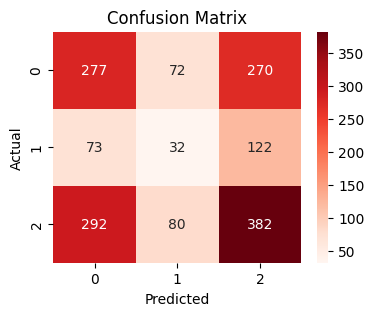

In [18]:
model_selector.predict_on_test()

### Second Grid Search CV with custom cost function

In [17]:
grid_search2 = ModelSelection(
    x_train=X_trainP, 
    y_train=y_trainP,
    estimators=estimators,
    x_test=X_testP,
    y_test=y_test,
    cost_matrix=error_cost_matrix
)

grid_search2.encode_y_train()
grid_search2.create_col_transformer()

In [18]:
param_grid = {
    'ClassificationModel__n_estimators': [50, 100, 150, 200, 250, 300],
    'ClassificationModel__max_depth': [None, 10, 20, 30],
    'ClassificationModel__min_samples_split': [2, 5, 10, 20]
}

In [19]:
grid_search2.apply_grid_cv(
    estimator=RandomForestClassifier(random_state=0),
    params=param_grid,
    cv=5,
    scoring=matrix_error_function
)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found by GridSearchCV (make_scorer(custom_error_cost_score, greater_is_better=False, response_method='predict')):
{'ClassificationModel__max_depth': None, 'ClassificationModel__min_samples_split': 5, 'ClassificationModel__n_estimators': 200}

Best score found by GridSearchCV (make_scorer(custom_error_cost_score, greater_is_better=False, response_method='predict')):
-0.5630246016720722


In [21]:
grid_search2.grid_best_score

-0.5630246016720722

{0: -1, 1: 0, 2: 1}
              precision    recall  f1-score   support

           0       0.43      0.42      0.43       619
           1       0.17      0.14      0.15       227
           2       0.49      0.53      0.51       754

    accuracy                           0.43      1600
   macro avg       0.37      0.36      0.36      1600
weighted avg       0.43      0.43      0.43      1600

{0: -1, 1: 0, 2: 1}


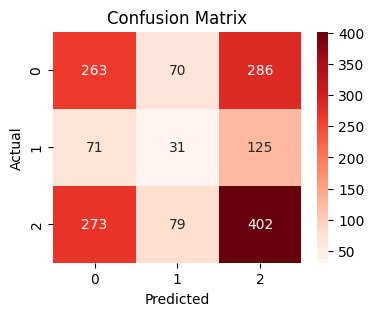

In [22]:
grid_search2.predict_on_test()

## Cost Matrix Error on test

In [33]:
custom_error_cost_score(grid_search2.target_label_encoder.transform(y_test.values.ravel()), grid_search2.grid_best_model.predict(X_testP))

0.914375

### Predict on real dataset

In [37]:
X_test_compete = X_test_compete.loc[:, X_test_compete.columns != 'Group']
######################################## Imputing Missing Values
X_test_compete = pd.DataFrame(objs['miss'].transform(X_test_compete), columns=X_test_compete.columns)
######################################## Scaling
X_test_compete = pd.DataFrame(objs['scaler'].transform(X_test_compete[num_cols_test]), columns=num_cols_test).reset_index(drop=True)
######################################## RFECV
subset_features_rfecv = X_trainP.columns.to_list()
X_test_compete = X_test_compete.loc[:, subset_features_rfecv]

In [43]:
preds = pd.DataFrame(grid_search2.grid_best_model.predict(X_test_compete)).replace(grid_search2.target_label_mapping)

In [44]:
file_path = "preds_comb4_5.txt"
preds.to_csv(file_path, index=False, header=False)